In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
import xgboost
import shap
shap.initjs()

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Часть1: Многоклассовая классификация

Были использованы семь различных типов зёрен, с учетом таких особенностей, как форма, внешний вид и структура. Была разработана система компьютерного зрения, позволяющая различать семь различных зарегистрированных сортов сухих зёрен со сходными признаками, чтобы получить единообразную классификацию семян. Для модуля классификации с помощью камеры высокого разрешения были получены изображения 13 611 зёрен семи различных зарегистрированных семян. Изображения зёрен, полученные с помощью системы компьютерного зрения, подвергаются этапам сегментации и выделения признаков, и из зёрен было получено в общей сложности 16 признаков; 12 размеров и 4 формы.

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)


In [5]:
df = pd.read_csv("Dry_Bean.csv")
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [9]:
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


<AxesSubplot:>

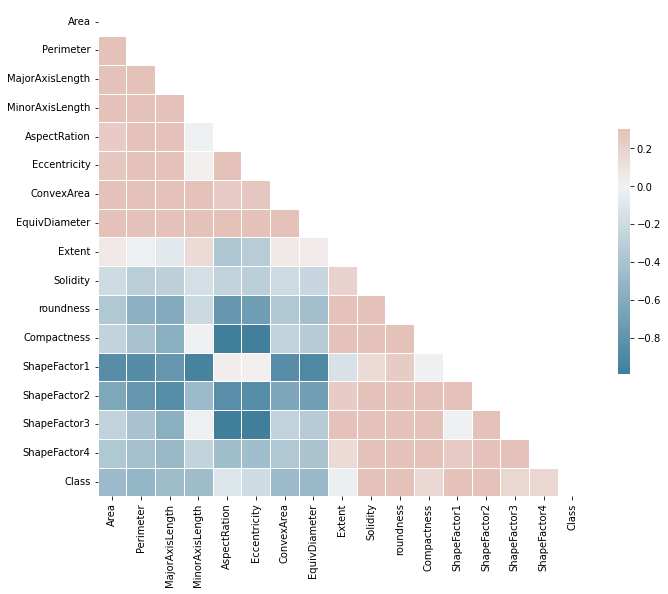

In [10]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Наблюдаем слабую положительную корреляции признаков, однако, существует достаточно большая обратная зависимость таких признаков: ShapeFactor1, ShapeFactor2, AspectRation, Eccentricity. Для лучшего обучения ими можно пренебреч.  

In [11]:
 df = df.drop(columns = ['ShapeFactor1','ShapeFactor2', 'AspectRation',\
                         'Eccentricity'])

In [12]:
X = df.drop(columns='Class')
y = df['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

[0.09121246 0.09128187 0.09723184 0.10899012 0.08388406 0.09179955
 0.02027522 0.02280921 0.08277927 0.12770729 0.14563353 0.03639559]


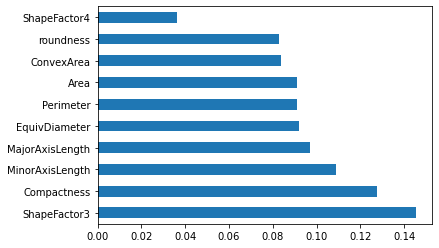

In [14]:
# убучим первую модель
model_1 = ExtraTreesClassifier(n_estimators=100, random_state=16)
model_1.fit(X,y)
print(model_1.feature_importances_)

feat_importances = pd.Series(model_1.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
# учим вторую модель
model_2 = xgboost.train({"learning_rate": 0.01}, 
                      xgboost.DMatrix(X_train, label=y_train), 100)

In [16]:
explainer = shap.TreeExplainer(model_2)
shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

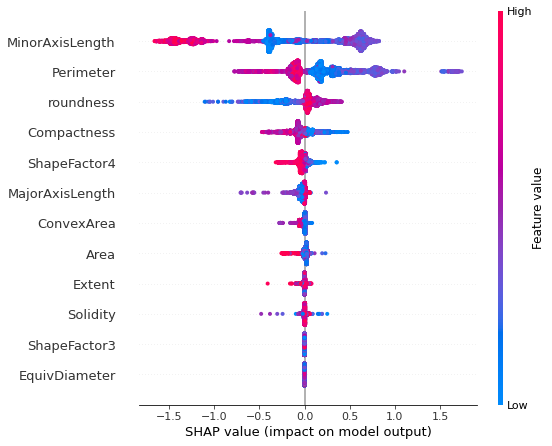

In [17]:
shap.summary_plot(shap_values, X_train)

# Часть2: бинарная классификация

In [18]:
df_test = pd.read_csv("titanic_test.csv")
df_train = pd.read_csv("titanic_train.csv")
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [19]:
df_train = df_train.drop(columns = ['Name','PassengerId', 'Cabin',\
                         'Embarked', 'Ticket', 'Fare'])
# Fare(стоимость билета) удаляем по причине прямого отношения к Pclass(класс)

In [20]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [22]:
df_train["Sex"] = labelencoder.fit_transform(df_train['Sex'])
df_test["Sex"] = labelencoder.fit_transform(df_test['Sex'])
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0


In [23]:
X = df_train.drop(columns='Survived')
y = df_train['Survived']

In [24]:
X = X.fillna(0)

[0.13908328 0.37250093 0.36519883 0.06571823 0.05749874]


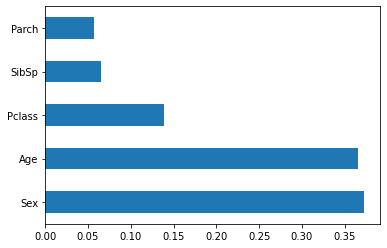

In [25]:
# убучим первую модель
model_1 = ExtraTreesClassifier(n_estimators=100, random_state=16)
model_1.fit(X,y)
print(model_1.feature_importances_)

feat_importances = pd.Series(model_1.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [26]:
# учим вторую модель
model_2 = xgboost.train({"learning_rate": 0.01}, 
                      xgboost.DMatrix(X, label=y), 100)

In [27]:
explainer = shap.TreeExplainer(model_2)
shap_values = explainer.shap_values(X)

shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [28]:
shap.force_plot(explainer.expected_value, shap_values, X)

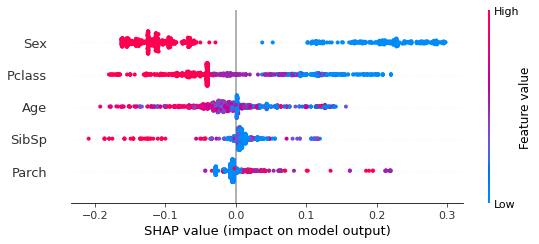

In [29]:
shap.summary_plot(shap_values, X)

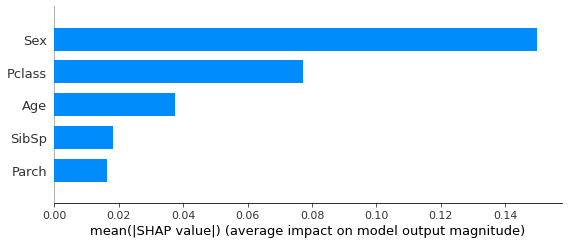

In [30]:
shap.summary_plot(shap_values, X, plot_type="bar")

# Интерпретация

1) В случае многоклассовой классификации можно лишь выделить 2-3 признака, оказывающих наибольшее влияние на деление семян по категориям. В то же время достаточно тяжело на словах выразить взаимосвязи признаков, опираясь на графики.

2) С бинарной классификацией всё намного проще: по графикам можно много чего заключить (в словах). Во-первых, мы видим три основных маркера, определяющих процент выживших (пол, класс и возраст). Во-вторых можно улавить связи между признаками. Графики показывают, например, что определяющий фактор - пол (мужчины гибли, спасая женщин); шансы на спасения повышались если пассажир путешествовал первым классом; видно также что старались спасти детей.  